<a href="https://colab.research.google.com/github/LightEagle89/test2/blob/main/%D0%94%D0%97_%E2%84%96_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('heart.csv').drop_duplicates()
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


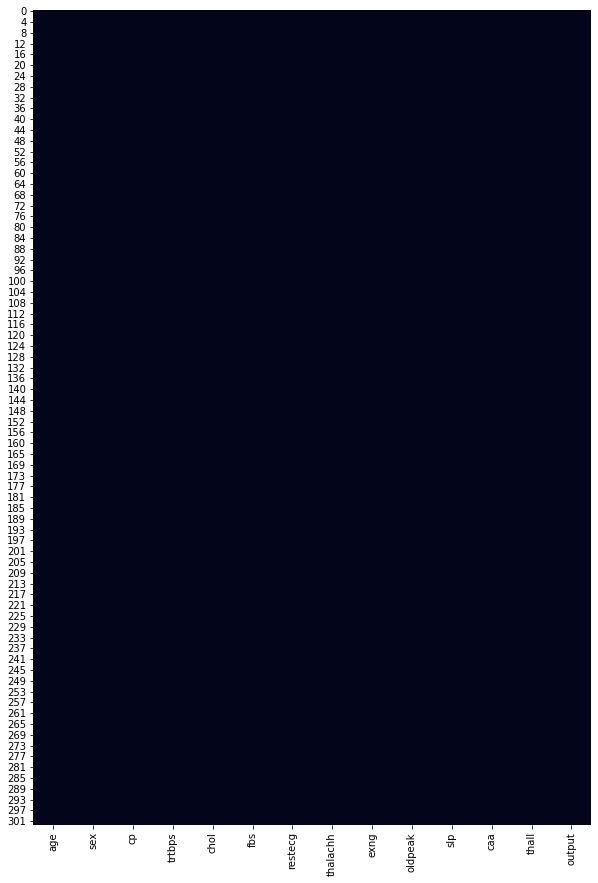

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Histograms to evaluate features' correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f882d10ab10>,
      dtype=object)

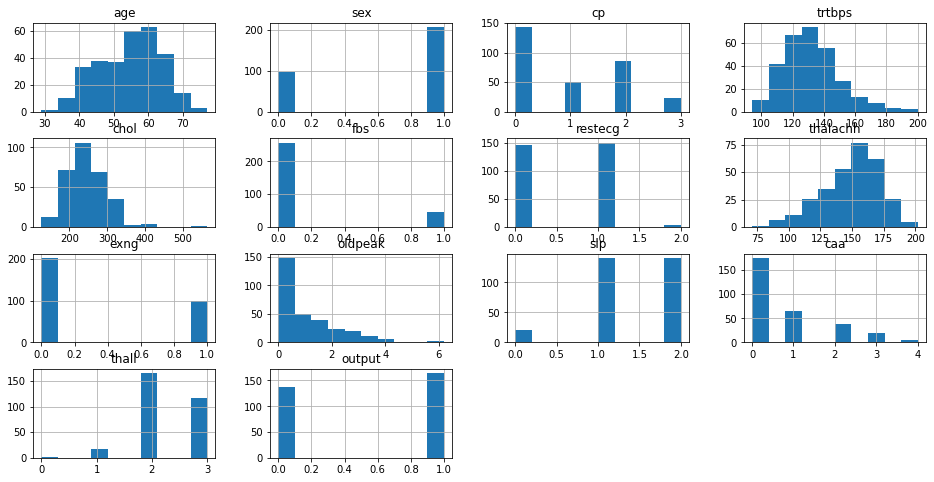

In [ ]:
df.hist(figsize=(16,8))

Correlation matrix (heatmap)

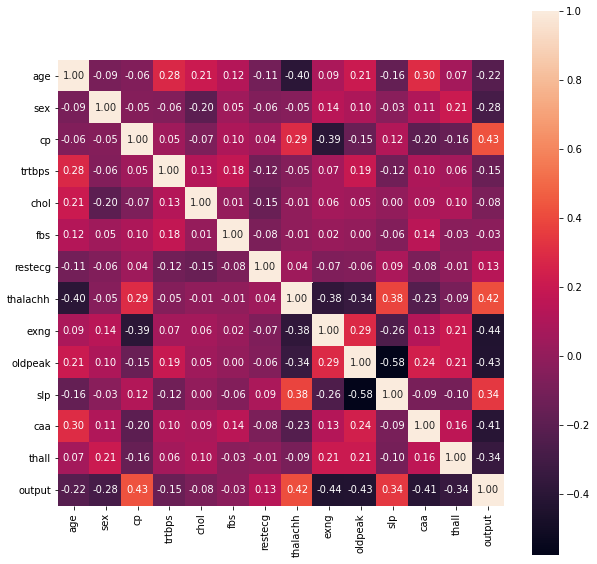

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
plt.show()

Features plots (overall)

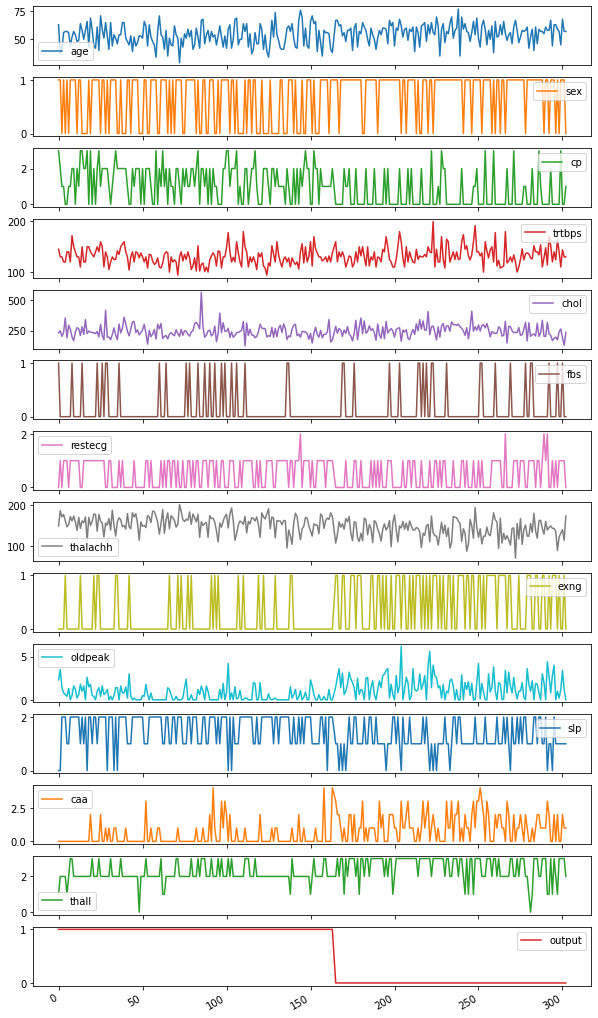

In [ ]:
df.plot(subplots=True, figsize = (10, 20))
plt.show()

Models

In [ ]:
X = df.drop('output', axis = 1)
y = df['output']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
knn_grid = {'n_neighbors': np.array(np.linspace(15, 35, 20), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)
gs.fit(X, y)
gs.best_params_, gs.best_score_

({'n_neighbors': 27}, 0.6557923497267759)

In [ ]:
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

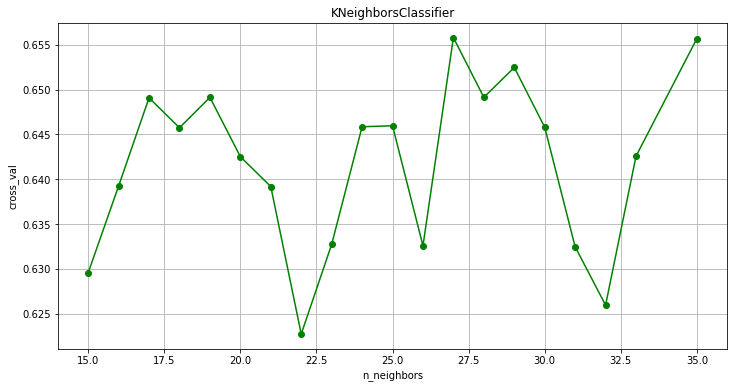

In [ ]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=27, n_jobs=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=4, n_neighbors=27, p=2,
                     weights='uniform')

In [ ]:
y_knn = knn.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        35
           1       0.67      0.76      0.71        41

    accuracy                           0.67        76
   macro avg       0.67      0.66      0.66        76
weighted avg       0.67      0.67      0.67        76



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
alg = LogisticRegression()

grid = {'penalty': ['l1', 'l2', 'elasticnet'],
        'C': np.array(np.logspace(-5, 5, num = 2), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


({'C': 100000.0, 'penalty': 'l2'}, 0.8584541062801933)

In [ ]:
logreg = LogisticRegression(penalty='l2', C = 100000.0)

logreg.fit(X_train, y_train)

preds = logreg.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.83      0.85      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000)
model_rf.fit(X_train, y_train)

# Сделаем предсказания
predictions_rf = model_rf.predict(X_test)
print(predictions_rf[:100])
predictions_rf.shape

[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1
 0 1]


(76,)

In [ ]:
print(metrics.classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.92      0.88      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.90      0.89        76
weighted avg       0.90      0.89      0.89        76



Conclusion

Поскольку классы являются сбалансированными (что следует из графиков из раздела Features plots (overall), то для оценки предсказаний можем использовать метрику Accuracy. Наиболее высокий показатель - у модели "Наивный Байес".